### Linear regression
$\mathcal X=\mathbb R^d$, $\mathcal Y=\mathbb R$,
$$ \|w\|_1:=\sum_{i=1}^d |w_i|,\quad \|w\|_2:=\sqrt{\sum_{i=1}^d |w_i|^2},$$
+ Ordinary linear regression (Ordinary least squares: OLS)
$$ L_S(h)=\frac{1}{n}\sum_{i=1}^n(\langle w,x_i\rangle+b-y_i)^2\to\min_{w,b}$$
+ Ridge regression
$$ L_S(h)+\alpha\|w\|_2^2\to\min_{w,b}$$
+ Lasso
$$ L_S(h)+\alpha\|w\|_1\to\min_{w,b}$$
+ Elastic net
$$ L_S(h)+\alpha_1\|w\|_2^2+\alpha_2\|w\|_1\to\min_{w,b}$$

#### Regularized empirical risk minimization:
$$\frac{1}{n}\sum_{i=1}^n l(f(x_i),y_i)+\alpha R(f)\to\min,\qquad f\in\mathcal H.$$ 
For linear regression:
$$\mathcal H=\{x\mapsto h(x)=\langle w,x\rangle+b\},$$
$R$ is a regularizer (measure of model complexity).

In [66]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True, precision=3)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [67]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
X.shape

(506, 13)

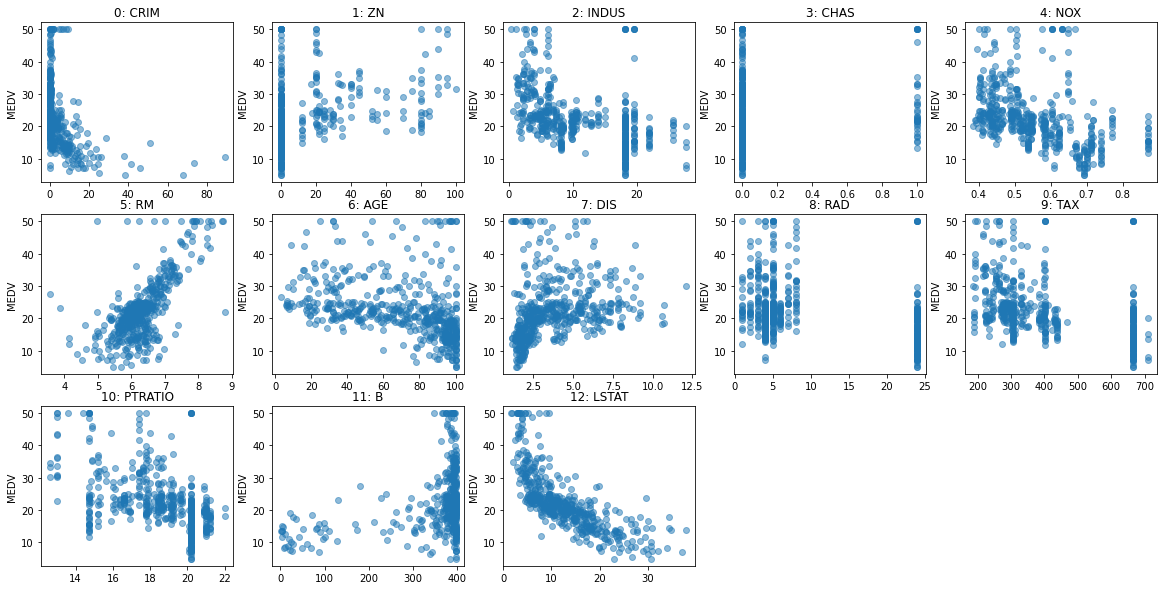

In [69]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

**Feature distributions**

Text(0, 0.5, 'MEDV')

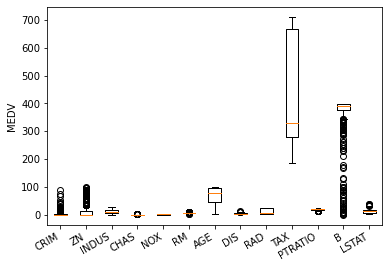

In [70]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

Compare OLS and Ridge regression with the default parameter.

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.7171866313426761

In [72]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.715273454590047

Using standard scaler.

In [73]:
from sklearn.preprocessing import StandardScaler
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)
ridge.score(X_train_scaled, y_train)
#X_test_scaled = scaler.transform(X_test)
#ridge.score(X_test_scaled, y_test)

0.76975318699993

In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
print(param_grid)

{'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])}


In [75]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             return_train_score=True)

In [76]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)

<ipython-input-77-73df9c20bb6c>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),
<ipython-input-77-73df9c20bb6c>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),


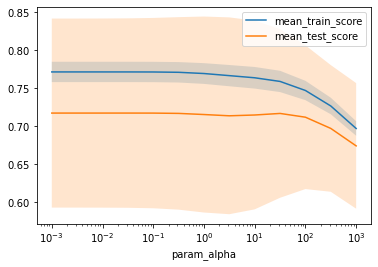

In [77]:
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("images/ridge_alpha_search.png")

Smallest $\alpha$ are the best: regularization is not needed.

In [78]:
grid.best_params_

{'alpha': 0.03162277660168379}

In [79]:
grid.best_score_

0.7171937896670371

#### Adding polynomial features

In [80]:
from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.impute import SimpleImputer
X, y = boston.data, boston.target
X_poly = PolynomialFeatures(include_bias=False).fit_transform(SimpleImputer().fit_transform(scale(X)))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [81]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.8065638995073069

In [82]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.8227099613418721

In [83]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             return_train_score=True)

<ipython-input-84-174170d243f2>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),
<ipython-input-84-174170d243f2>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),


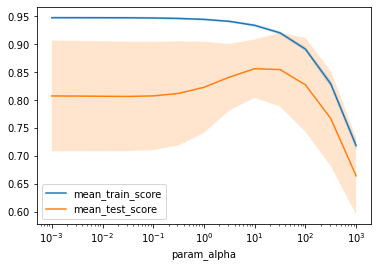

In [84]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("images/ridge_alpha_search_poly.png")

In [85]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 10.0}
0.8560976200047946


In [86]:
grid.score(X_test, y_test)

0.8055433024041876

#### Plotting the coefficients

For OLS two extreme coefficients are of order $10^{11}$. The target variable has much smaller order. This means that these two features are collinear and cancel each other.

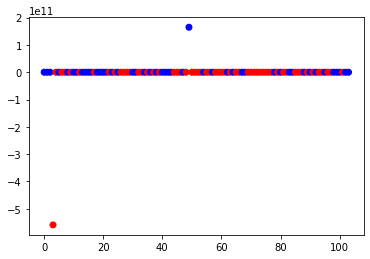

In [87]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")
plt.savefig("images/lr_coefficients_large.png")

The coefficients corresponing to the best parameters after the grid search are on the same scale, and they are not too large.

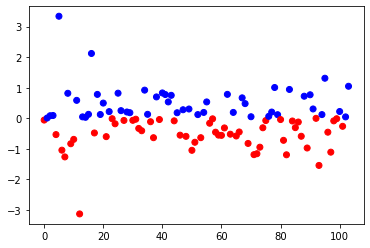

In [88]:
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")
plt.savefig("images/ridge_coefficients.png")

The influence of $\alpha$ on the coefficients 
* As $\alpha$ increases, the coefficients go to zero with different speed
* Some of them change the sign

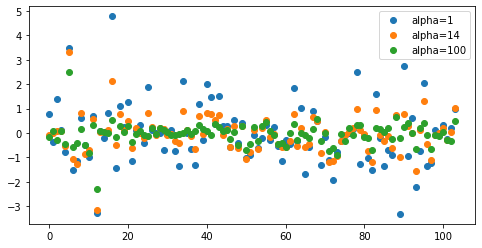

In [89]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()
plt.savefig("images/ridge_coefficients_alpha.png")

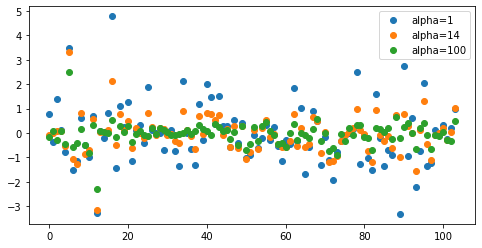

In [90]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()
plt.savefig("images/ridge_coefficients_alpha.png")

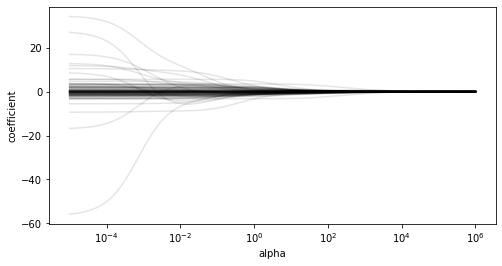

In [91]:
n_alphas = 200
alphas = np.logspace(-5, 6, n_alphas)
plt.figure(figsize=(8, 4))
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")
plt.savefig("images/ridge_coefficient_paths.png")

#### Learning curves 
show the dependence of the score on the number of samples

(-1.0, 1.0)

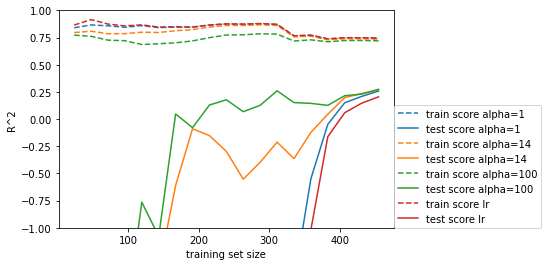

In [92]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Ridge(alpha=1), "alpha=1")
plot_learning_curve(Ridge(alpha=14), "alpha=14")
plot_learning_curve(Ridge(alpha=100), "alpha=100")

plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")
plt.ylim(-1, 1)

For small amount of data the OLS perform badly due to strong overfitting. For large number of examples this overfitting goes away.

#### Lasso regression

Not only shrinks $w$ towards zero, but also makes some of them exactly zero: automatic feature slection.

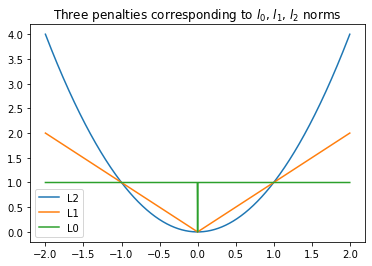

In [93]:
line = np.linspace(-2, 2, 1001)
plt.plot(line, line ** 2, label="L2")
plt.plot(line, np.abs(line), label="L1")
plt.plot(line, line!=0, label="L0")
plt.legend()
plt.savefig("images/l2_l1_l0.png")
plt.title("Three penalties corresponding to $l_0$, $l_1$, $l_2$ norms");

$$ \|w\|_1:=\sum_{i=1}^d |w_i|,\quad \|w\|_2:=\sqrt{\sum_{i=1}^d |w_i|^2},\quad \|w\|_0:=\sum_{i=1}^n I_{\{w_i\neq 0\}}$$

Consider 
$$ f_1(x)=(2x-1)^2,\quad f_2(x)= (2x-1)^2+\alpha x^2,\quad f_3(x)= (2x-1)^2+\alpha |x|. $$

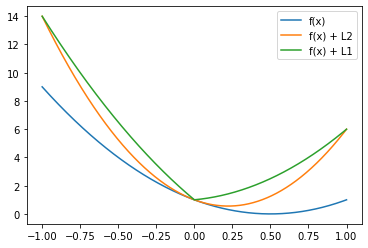

In [94]:
line = np.linspace(-1, 1, 1001)
alpha_l1 = 5
alpha_l2 = 5
f_x = (2 * line - 1) ** 2
f_x_l2 =  f_x + alpha_l2 * line ** 2
f_x_l1 =  f_x + alpha_l1 * np.abs(line)

plt.plot(line, f_x, label="f(x)")
plt.plot(line, f_x_l2, label="f(x) + L2")
plt.plot(line, f_x_l1, label="f(x) + L1")
plt.legend()
plt.savefig("images/l1_kink.png")

$l_1$-norm introduces a kink at zero. It is likely to get minimum at zero in this case.

A comparison of $l_1$ and $l_2$ penalties in two-dimensional case: illustration.

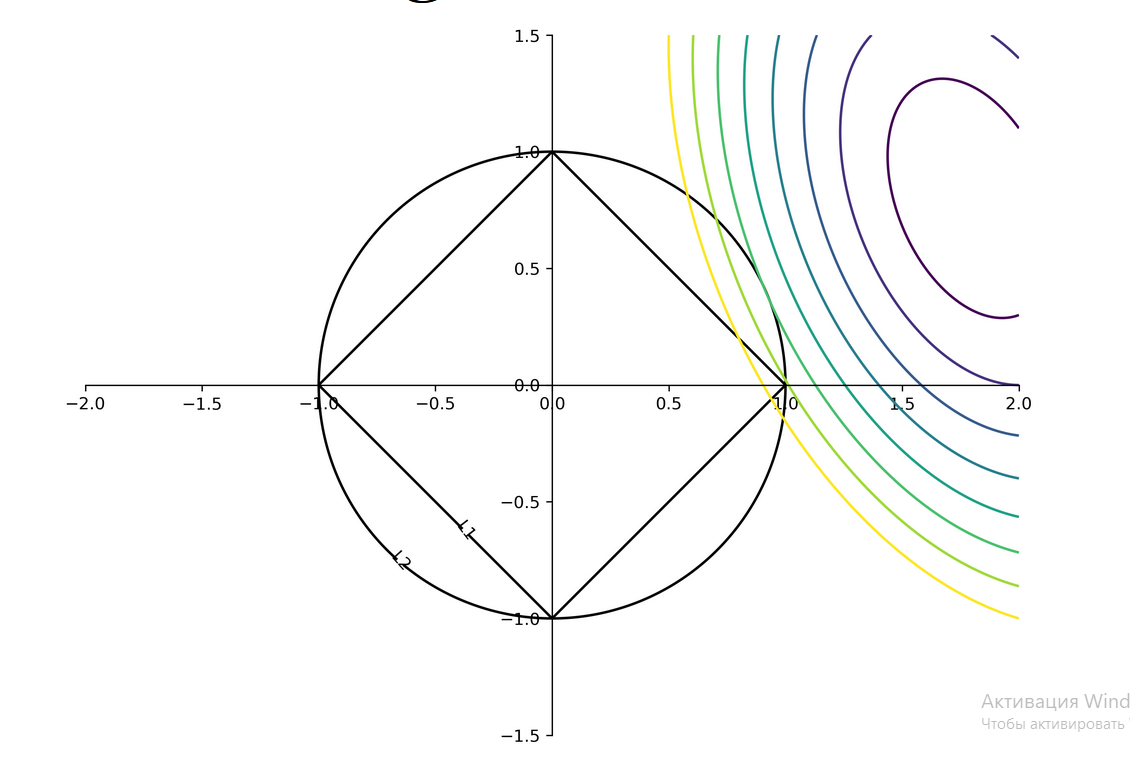

In [95]:
from IPython.display import Image
Image(filename = "l1_l2.png", width = 600, height = 300)

In [96]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)

{'alpha': array([0.001, 0.002, 0.003, 0.006, 0.01 , 0.018, 0.032, 0.056, 0.1  ,
       0.178, 0.316, 0.562, 1.   ])}


In [97]:
X_train.shape

(379, 104)

In [98]:
grid = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=1000000.0, normalize=True),
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.006, 0.01 , 0.018, 0.032, 0.056, 0.1  ,
       0.178, 0.316, 0.562, 1.   ])},
             return_train_score=True)

<ipython-input-99-a394be3757d8>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),
<ipython-input-99-a394be3757d8>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),


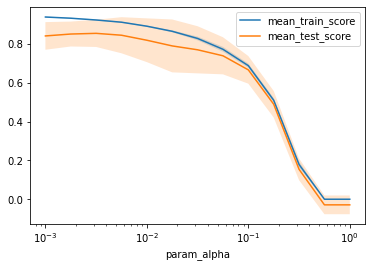

In [99]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("images/lasso_alpha_search.png")

Looks like underfitting: no need of regularization, train and test errors are similar.

In [100]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.0031622776601683794}
0.8536652758001477


In [101]:
grid.score(X_test, y_test)

0.7866935312995618

Adding polynomial features

In [102]:
from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.impute import SimpleImputer
X, y = boston.data, boston.target
X_poly = PolynomialFeatures(include_bias=False).fit_transform(SimpleImputer().fit_transform(scale(X)))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [103]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
grid = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.6349598614363, tolerance: 3.055030340175953
  model = cd_fast.enet_coordinate_descent(
C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734.3477181985523, tolerance: 3.0102712140762464
  model = cd_fast.enet_coordinate_descent(
C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 729.7119475980957, tolerance: 2.9189065806451615
  model = cd_fast.enet_coordinate_descent(
C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.99302547449065, tolerance: 2.9189065806451615
  model = cd_fast.enet_coordinate_descent(
C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.911353019942226, tolerance: 3.107898064516129
  model = cd_fast.enet_coordinate_descent(
C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.103343570831157, tolerance: 2.9370749032258066
  model = cd_fast.enet_coordinate_descent(
C:\Users\rokhl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.006, 0.01 , 0.018, 0.032, 0.056, 0.1  ,
       0.178, 0.316, 0.562, 1.   ])},
             return_train_score=True)

<ipython-input-104-174170d243f2>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),
<ipython-input-104-174170d243f2>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_alpha.astype(np.float),


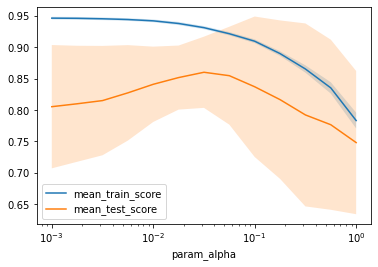

In [104]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("images/ridge_alpha_search_poly.png")

In [105]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.03162277660168379}
0.8600886917250626


In [106]:
grid.score(X_test, y_test)

0.7954384706556334

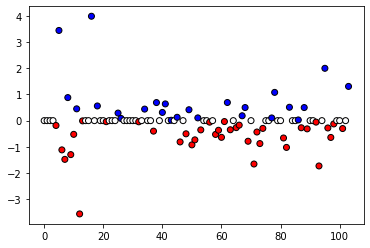

In [107]:
lasso = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')
plt.savefig("images/lasso_coefficients.png")

Number of non-zero coefficients

In [108]:
print(X_poly.shape)
np.sum(lasso.coef_ != 0)

(506, 104)


63

In [109]:
from sklearn.linear_model import lars_path
# lars_path computes the exact regularization path which is piecewise linear.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
alphas, active, coefs = lars_path(X_train, y_train, eps=0.00001, method="lasso")

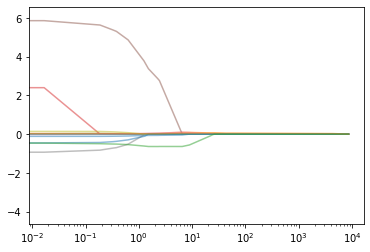

In [110]:
plt.plot(alphas, coefs.T, alpha=.5)
plt.xscale("log")
plt.savefig("images/lars_path.png")

#### Elastic net

Parametrization in scikit-learn:

$$\sum_{i=1}^n(\langle w,x_i\rangle+b-y_i)^2+\alpha\eta\|w\|_1+\alpha(1-\eta)\|w\|_2^2\to\min_{w,b}$$

$\eta$ is called `l1_ratio`

In [111]:
from sklearn.preprocessing import PolynomialFeatures, scale
X, y = boston.data, boston.target
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

param_grid = {'alpha': np.logspace(-4, -1, 10), 'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
print(param_grid)

(506, 104)
{'alpha': array([0.   , 0.   , 0.   , 0.001, 0.002, 0.005, 0.01 , 0.022, 0.046,
       0.1  ]), 'l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.98, 1]}


In [112]:
from sklearn.linear_model import ElasticNet
grid = GridSearchCV(ElasticNet(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=1000000.0, normalize=True),
             param_grid={'alpha': array([0.   , 0.   , 0.   , 0.001, 0.002, 0.005, 0.01 , 0.022, 0.046,
       0.1  ]),
                         'l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.98, 1]},
             return_train_score=True)

In [113]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001, 'l1_ratio': 0.9}
0.8597018350123726


In [114]:
grid.score(X_test, y_test)

0.8047249418267615

In [125]:
import pandas as pd
res = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
res

param_l1_ratio,0.01,0.10,0.50,0.90,0.98,1.00
param_alpha,,,,,,
0.000100,0.855031,0.853960,0.845268,0.820295,0.810918,0.807426
0.000215,0.858752,0.858965,0.856981,0.835292,0.819560,0.814589
0.000464,0.849762,0.851504,0.858214,0.852142,0.835811,0.828769
0.001000,0.826765,0.830095,0.846317,0.859702,0.850036,0.840345
0.002154,0.787563,0.792990,0.819886,0.853395,0.856167,0.851969
0.004642,0.725637,0.734271,0.777666,0.832998,0.846072,0.849584
0.010000,0.629129,0.641171,0.707155,0.796964,0.814120,0.818164
0.021544,0.494167,0.508051,0.589991,0.744369,0.779966,0.782836
0.046416,0.340459,0.351458,0.424103,0.631534,0.728185,0.752005


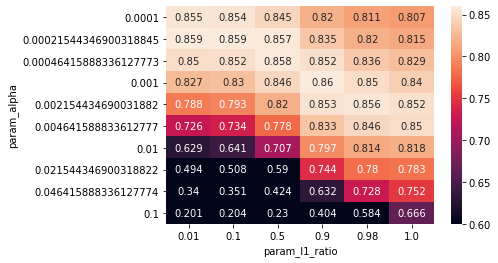

In [131]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)
plt.savefig("images/elasticnet_search.png")